In [1]:
import MySQLdb
conn = MySQLdb.connect(host='127.0.0.1', port=3306, user='root', passwd='123', db='edm', charset='utf8')
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pandas.io.sql as sql
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
data = pd.DataFrame()
for i in range(14):
    data_t = pd.read_csv('C:\\Users\\X1\\Desktop\\indicator\\'+(str)(i)+'_indicator.csv')
    data = pd.concat([data, data_t])

In [4]:
data.shape

(1273, 6)

In [5]:
data.head()

,stage_index,study_effect,study_active,resource_userate,resource_transrate,question_correctrate
0,0,5.631104,6.006511,12.013022,0.125,0.93750
1,0,0.000000,0.000000,0.000000,1.000,0.93750
2,0,0.000000,0.000000,0.000000,1.000,0.96875
3,0,0.000000,0.000000,0.000000,1.000,0.93750
4,0,0.000000,0.000000,0.000000,1.000,0.93750


In [6]:
 data['stage_index'].value_counts()

0     133
1      60
3      53
11     43
14     42
20     35
10     34
5      34
13     34
4      33
19     33
17     31
18     27
2      26
27     25
12     23
9      23
7      22
21     21
37     21
6      20
8      18
32     18
80     17
39     17
36     17
42     16
23     15
79     15
30     15
     ... 
34     14
35     14
38     14
45     13
28     13
25     13
43     13
68     13
78     12
44     12
81     12
75     11
86     10
77     10
82      9
76      9
83      9
84      9
85      8
46      7
73      7
87      7
31      6
74      6
72      6
70      6
41      5
64      4
69      4
40      3
Name: stage_index, Length: 65, dtype: int64

Text(0,0.5,'number of records')

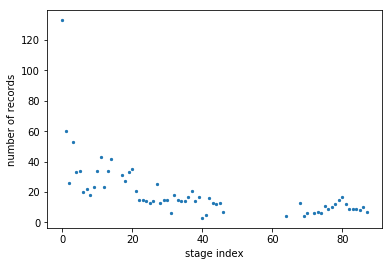

In [7]:
t = data['stage_index'].value_counts()
plt.scatter(t.index, t, s=5)
plt.xlabel('stage index')
plt.ylabel('number of records')

### 上次技能点数据（与试卷对应）共226个技能点
### 本次阶段数据（self_test_history）共65个阶段-对应多少技能点？

In [10]:
data4 = data.iloc[:, 1:]

Text(0,0.5,'Distortion')

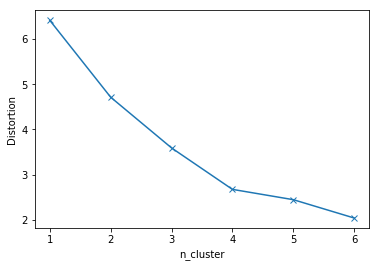

In [12]:
from scipy.spatial.distance import cdist
K=range(1,7)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data4)
    meandistortions.append(sum(np.min(cdist(data4,kmeans.cluster_centers_, 'euclidean'),axis=1))/data4.shape[0])
plt.plot(K,meandistortions,'x-')
plt.xlabel('n_cluster')
plt.xticks(np.arange(1,7,1))
plt.ylabel('Distortion')

## 1.对阶段进行聚类：聚4类似乎比较合适

In [8]:
from sklearn import preprocessing

- 去掉数据为0（未进行课件学习）的记录

In [25]:
data4 = data4[data4['study_effect']!=0]
data4.head() # 已经检查，其他列值均不存在0

,study_effect,study_active,resource_userate,resource_transrate,question_correctrate,label
0,5.631104,6.006511,12.013022,0.125000,0.937500,1
6,1.034975,1.207471,2.414941,0.250000,0.857143,1
11,0.505839,1.011677,2.023354,0.166667,0.500000,0
13,0.049422,0.494223,1.235557,0.200000,0.100000,0
15,0.226487,0.301983,0.704627,0.142857,0.750000,1


In [26]:
data4.shape

(715, 6)

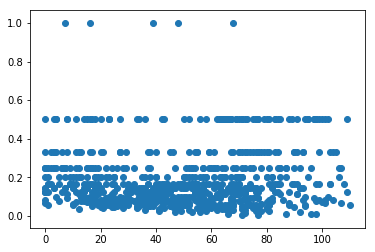

In [50]:
plt.scatter(data4.index, data4['resource_transrate'])

In [70]:
data4 = data4.sort_values(by=['resource_userate']).iloc[:-1, :]
data4.sort_values(by=['resource_userate']).tail()

,study_effect,study_active,resource_userate,resource_transrate,question_correctrate,label
58,8.316347,8.316347,74.847122,0.027778,1.0,1
87,1.322535,1.653169,77.698942,0.010638,0.8,1
75,7.154458,8.943073,80.487654,0.055556,0.8,1
25,14.815536,14.815536,81.485448,0.045455,1.0,1
71,0.473860,1.184650,88.256441,0.006711,0.4,1


- 96的userate异常，去掉

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 8 Text yticklabel objects>)

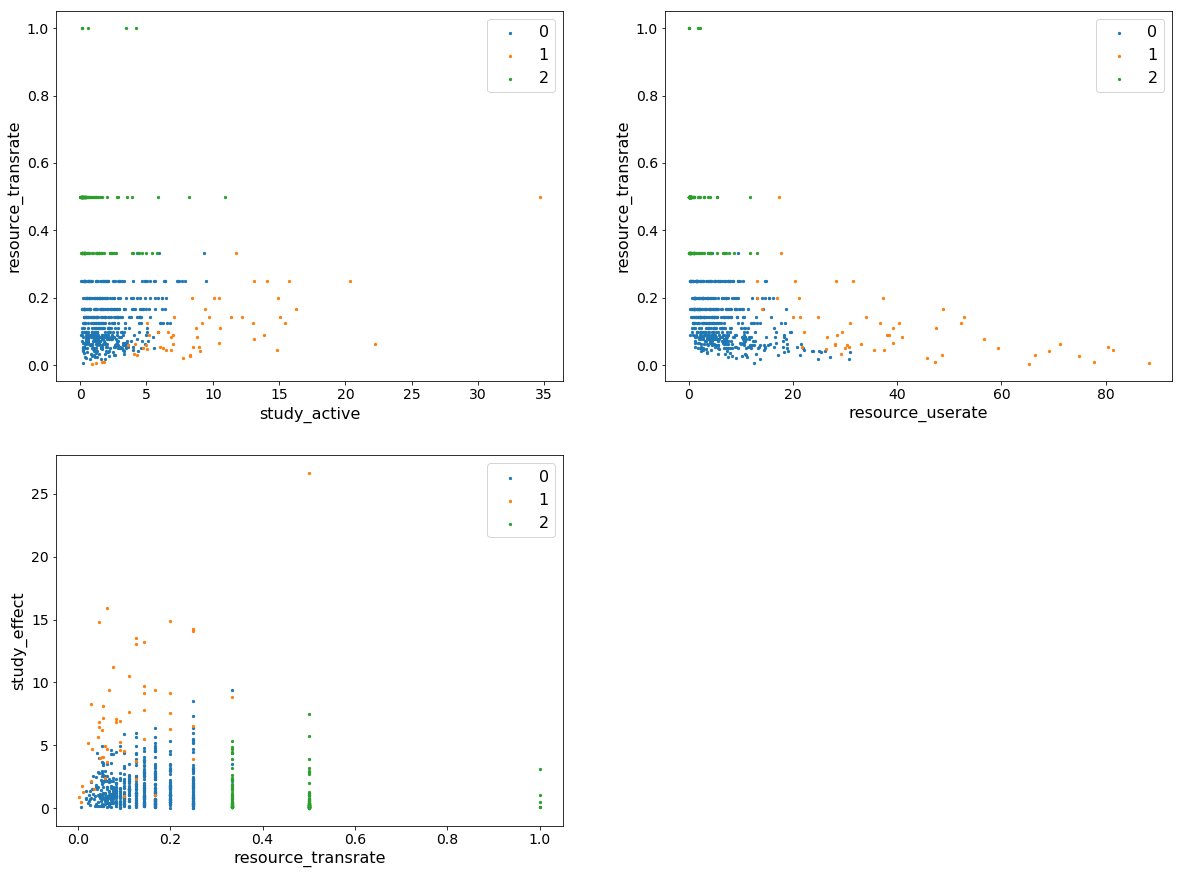

In [92]:
myModel = KMeans(n_clusters=3)
data_to_cluster=preprocessing.scale(data4.loc[:,['study_active', 'resource_userate', 'resource_transrate', 'question_correctrate']])
myModel.fit(data_to_cluster)
label_pred = myModel.labels_
centroids = myModel.cluster_centers_

data4['label'] = label_pred#

data4_1 = data4[data4['label']==1]
data4_2 = data4[data4['label']==2]
data4_0 = data4[data4['label']==0]
#data4_3 = data4[data4['label']==3]

list4 = [data4_0,data4_1, data4_2]

plt.figure(figsize=(20, 15))

plt.subplot(221)
for result in list4:
    plt.scatter(result['study_active'], result['resource_transrate'],s=5)
legend_list=['0','1', '2']
plt.legend(legend_list, fontsize=16)
plt.xlabel('study_active',fontsize=16 )
plt.ylabel('resource_transrate',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(222)
for result in list4:
    plt.scatter(result['resource_userate'], result['resource_transrate'],s=5)
legend_list=['0','1', '2']
plt.legend(legend_list, fontsize=16)
plt.xlabel('resource_userate',fontsize=16 )
plt.ylabel('resource_transrate',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(223)
for result in list4:
    plt.scatter(result['resource_transrate'], result['study_effect'],s=5)

legend_list=['0','1', '2','3']
plt.legend(legend_list, fontsize=16)
plt.xlabel('resource_transrate',fontsize=16 )
plt.ylabel('study_effect',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

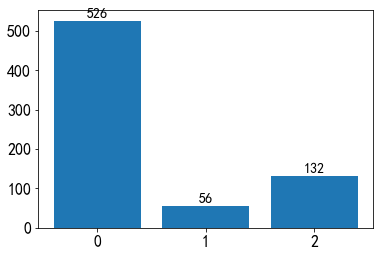

In [123]:
x = data4['label'].value_counts().index
y = data4['label'].value_counts()
plt.bar(x,y)
plt.xticks([0,1,2], fontsize=16)
plt.yticks(fontsize=16)
for a,b in zip(x,y):
    plt.text(a, b+2, '%.0f' % b, ha='center', va='bottom',fontsize=14)

In [94]:

from mpl_toolkits.mplot3d import Axes3D

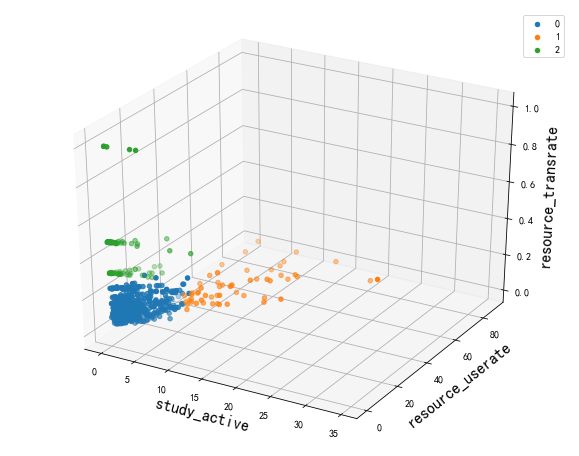

In [95]:
fig = plt.figure(figsize=(10,8))
plt.rcParams['font.sans-serif']=['SimHei']
ax = fig.add_subplot(1,1,1, projection='3d')
for result in list4:
    ax.scatter(result['study_active'],result['resource_userate'],result['resource_transrate'] )
ax.set_ylabel('resource_userate',fontsize=16)  # 坐标轴
ax.set_zlabel('resource_transrate',fontsize=16)
ax.set_xlabel('study_active',fontsize=16)
ax.legend([0,1,2])

In [96]:
a = []
for result in list4:
    #print(result.mean(),'\n\n\n')
    a.append(result.mean())
data5 = pd.DataFrame(a)
data5

,study_effect,study_active,resource_userate,resource_transrate,question_correctrate,label
0,1.620020,2.052319,6.361396,0.131507,0.789306,0.0
1,7.162660,9.488742,39.377772,0.110095,0.764788,1.0
2,0.979181,1.166241,1.451142,0.452020,0.841433,2.0


In [97]:
data5.to_csv('C:\\Users\\X1\\Desktop\\clustered_para.csv')

- 说明：study_effect和study_active密切正相关

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text yticklabel objects>)

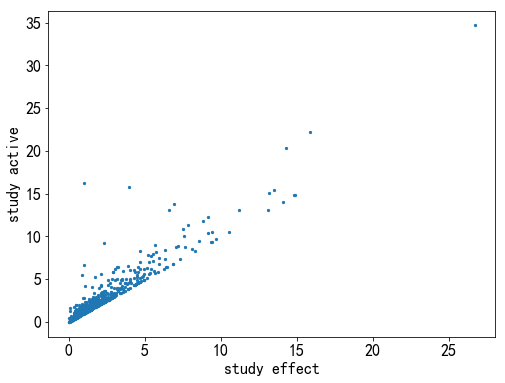

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(data4['study_effect'], data4['study_active'], s=5)
plt.xlabel('study effect', fontsize=16)
plt.ylabel('study active', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


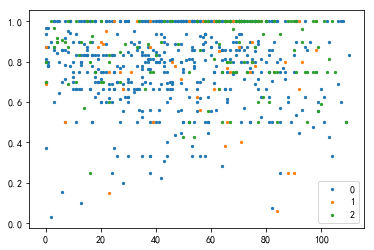

In [114]:
plt.scatter(data4_0['question_correctrate'].index, data4_0['question_correctrate'], s=5)
plt.scatter(data4_1['question_correctrate'].index, data4_1['question_correctrate'], s=5)
plt.scatter(data4_2['question_correctrate'].index, data4_2['question_correctrate'], s=5)

plt.legend(['0', '1', '2'])